# Pre-analysis of ePSIC Ptychography data

In [ ]:
fp = '/dls/e02/data/2020/cm26481-1/processing/Merlin/20200130_80kV_graphene_600C_pty/20200131_140834/80kV_600C_CLA_40um_CL_8cm_8C_20Mx_A2_4p71_dfneg30nm_scan_array_255by255_diff_plane_515by515_.hdf5'

In [2]:
%matplotlib inline
import numpy as np
import h5py
import sys
sys.path.append('/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/')
import ptyrex
import hyperspy.api as hs
import os

ImportError: No module named 'cv2'


2020-06-18 16:49:09,341:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/hyperspy/io_plugins/bruker.py:69:The fast cython based bcf unpacking library were found
2020-06-18 16:49:09,469:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/mrcz/ioMRC.py:51:`python-rapidjson` not found, using builtin `json` instead.
2020-06-18 16:49:14,196:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/hyperspy_gui_traitsui/__init__.py:30:Initial ETS toolkit set to 
2020-06-18 16:49:14,198:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/hyperspy_gui_traitsui/__init__.py:55:Loading hyperspy.traitsui_gui
2020-06-18 16:49:14,199:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/hyperspy_gui_traitsui/__init__.py:56:Current MPL backend: module://ipykernel.pylab.backend_inline
2020-06-18 16:49:14,200:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

### Lazy Hyperspy load of full 4D dataset

In [3]:
#fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/MoS2_15kV_100umClAp_3Mx_focus_A2_1p07.hdf5'
#fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 150231/MoS2_15kV_100umClAp_3Mx_77def_A2_1p07.hdf5'
#fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 152207/MoS2_15kV_100umClAp_3Mx_154def_A2_1p07_db.hdf5'

#fp = '/dls/e02/data/2020/cm26481-1/processing/Merlin/20200130_80kV_graphene_600C_pty/20200131_140834/80kV_600C_CLA_40um_CL_8cm_8C_20Mx_A2_4p71_dfneg30nm_scan_array_255by255_diff_plane_515by515_.hdf5'

d = hs.load(fp, lazy = True)

#reset navigation offset
d.axes_manager.navigation_axes[0].offset = 0
d.axes_manager.navigation_axes[1].offset = 0

### Take every nth probe position so can quickly visualise data

In [4]:
d_sub = d.inav[::1, ::1]
d_sub.compute()

[########################################] | 100% Completed |  3min 55.1s


In [5]:
%matplotlib qt 
#pop out plot - you may need to run this a couple of times

2020-06-18 16:53:26,128:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend Qt5Agg version unknown.


In [6]:
px_in_crop = 32
d_sub.plot()
sq_roi = hs.roi.RectangularROI(0,0,px_in_crop,px_in_crop)
roi_dat = sq_roi.interactive(d_sub)

2020-06-18 16:53:46,711:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6e905df5f8>
2020-06-18 16:53:46,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:608:Using auto colorbar locator on colorbar
2020-06-18 16:53:46,713:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:609:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6e905df5f8>
2020-06-18 16:53:46,714:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-18 16:53:46,720:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-06-18 

2020-06-18 16:53:46,752:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:46,753:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:46,754:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:46,755:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:46,756:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-18 16:53:46,787:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:46,788:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:46,789:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:46,790:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-R.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:46,790:/dls_sw/apps/python/anaconda/4.6.

2020-06-18 16:53:46,830:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 3.9713636363636367
2020-06-18 16:53:46,832:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:46,833:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:46,834:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN57F.ttf) normal normal 400 condensed>) = 10.25
2020-06-18 16:53:46,834:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyt

2020-06-18 16:53:46,861:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:46,862:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-18 16:53:46,863:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:46,863:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:46,864:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-18 16:53:46,891:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-18 16:53:46,892:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:46,893:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:46,894:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Regular.otf) normal normal regular normal>) = 10.05
2020-06-18 16:53:46,895:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-18 16:53:46,921:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:46,921:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:46,922:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:46,923:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:46,924:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-18 16:53:46,973:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:46,974:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 1.05
2020-06-18 16:53:46,974:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:46,975:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:46,976:/dls_sw/apps/python/anaconda/4.6.14/64/envs/p

2020-06-18 16:53:47,002:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,003:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-18 16:53:47,004:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,005:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:47,006:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-18 16:53:47,037:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal demi normal>) = 10.24
2020-06-18 16:53:47,038:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,038:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,039:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,040:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-18 16:53:47,068:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,068:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,069:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,070:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,071:/dls_sw/apps/python/anaconda/4.6.14/64

2020-06-18 16:53:47,108:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,108:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,109:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal roman normal>) = 10.145
2020-06-18 16:53:47,110:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,110:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-18 16:53:47,132:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,132:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,133:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Semibold.ttf) normal normal semibold normal>) = 10.24
2020-06-18 16:53:47,134:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,134:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-18 16:53:47,155:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,155:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,156:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,156:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,157:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python

2020-06-18 16:53:47,195:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 1.335
2020-06-18 16:53:47,196:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:47,197:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-18 16:53:47,197:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,198:/dls_sw/apps/python/anaconda/4.6.14

2020-06-18 16:53:47,226:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-18 16:53:47,227:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,228:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Ashkenaz CLM' (StamAshkenazCLM.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,229:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Oblique.otf) oblique normal 400 condensed>) = 10.35
2020-06-18 16:53:47,230:/dls_

2020-06-18 16:53:47,255:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,256:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,256:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Italic.otf) italic normal roman normal>) = 10.145
2020-06-18 16:53:47,257:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,258:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-18 16:53:47,280:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,280:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,281:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BookOblique.ttf) oblique normal book normal>) = 10.15
2020-06-18 16:53:47,282:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,282:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-18 16:53:47,302:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 11.535
2020-06-18 16:53:47,303:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-18 16:53:47,303:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,304:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight.ttf) normal normal light normal>) = 11.24
2020-06-18 16:53:47,304:/dls_sw/apps/python/anaconda

2020-06-18 16:53:47,323:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,323:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:47,324:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 10.15
2020-06-18 16:53:47,324:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:47,325:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-18 16:53:47,342:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:47,343:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 10.15
2020-06-18 16:53:47,343:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 10.25
2020-06-18 16:53:47,344:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Z003' (Z003-MediumItalic.otf) italic normal medium normal>) = 10.145
2020-06-18 16:53:47,345:/dls_sw/apps/python/anaconda/4.6

2020-06-18 16:53:47,384:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,384:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,385:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 1.05
2020-06-18 16:53:47,386:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 1.335
2020-06-18 16:53:47,386:/dls_sw/apps/python/anaconda/4.6.14

2020-06-18 16:53:47,404:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-18 16:53:47,405:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,406:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:47,406:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 10.535
2020-06-18 16:53:47,407:/dls_sw/apps/python/anaconda/4.6

2020-06-18 16:53:47,425:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,425:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,426:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,426:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,427:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-18 16:53:47,444:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,444:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,445:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,445:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial Black' (ariblk.ttf) normal normal black normal>) = 10.525
2020-06-18 16:53:47,446:/dls_sw/apps/python/anaconda/4.6.14/64/envs/py

2020-06-18 16:53:47,461:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,461:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal roman normal>) = 10.145
2020-06-18 16:53:47,461:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,462:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,462:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-18 16:53:47,486:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,487:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Semibold.ttf) normal normal semibold normal>) = 10.24
2020-06-18 16:53:47,487:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,488:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 11.535
2020-06-18 16:53:47,489:/dls_sw/apps/python/anaconda/4

2020-06-18 16:53:47,518:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,519:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,520:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,521:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-BoldOblique.otf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:47,522:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-18 16:53:47,557:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:47,557:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:47,558:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-18 16:53:47,559:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,559:/dls_sw/apps/python/anaconda/4.6.1

2020-06-18 16:53:47,581:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-18 16:53:47,582:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,583:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Ashkenaz CLM' (StamAshkenazCLM.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,583:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Oblique.otf) oblique normal 400 condensed>) = 10.35
2020-06-18 16:53:47,584:/dls_

2020-06-18 16:53:47,621:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,621:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,622:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Italic.otf) italic normal roman normal>) = 10.145
2020-06-18 16:53:47,623:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,623:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-18 16:53:47,641:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,641:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,642:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BookOblique.ttf) oblique normal book normal>) = 10.15
2020-06-18 16:53:47,642:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,643:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-18 16:53:47,664:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 11.535
2020-06-18 16:53:47,664:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-18 16:53:47,665:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:47,665:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight.ttf) normal normal light normal>) = 11.24
2020-06-18 16:53:47,666:/dls_sw/apps/python/anaconda

2020-06-18 16:53:47,682:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:47,682:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:47,683:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 10.15
2020-06-18 16:53:47,683:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:47,684:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-18 16:53:47,699:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:47,700:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 10.15
2020-06-18 16:53:47,700:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 10.25
2020-06-18 16:53:47,701:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Z003' (Z003-MediumItalic.otf) italic normal medium normal>) = 10.145
2020-06-18 16:53:47,701:/dls_sw/apps/python/anaconda/4.6

2020-06-18 16:53:47,726:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.335
2020-06-18 16:53:47,727:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.335
2020-06-18 16:53:47,727:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.0
2020-06-18 16:53:47,728:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.335
2020-06-18 16:53:47,728:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-18 16:53:47,746:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,747:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,747:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,748:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,748:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python

2020-06-18 16:53:47,765:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 11.145
2020-06-18 16:53:47,765:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Micro Hei' (wqy-microhei.ttc) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,766:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,766:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,767:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-18 16:53:47,788:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,789:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-18 16:53:47,789:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,790:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,790:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-18 16:53:47,806:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light-Italic.ttf) italic normal light normal>) = 11.24
2020-06-18 16:53:47,807:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,807:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,808:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-18 16:53:47,808:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-18 16:53:47,824:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,824:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,825:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,825:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,826:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-18 16:53:47,842:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-BdIta.otf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,842:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,843:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:47,843:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,844:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site

2020-06-18 16:53:47,860:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
2020-06-18 16:53:47,861:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,861:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:47,862:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-18 16:53:47,862:/dls_sw/apps/python/anaconda/4.6.14/

2020-06-18 16:53:47,892:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,893:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,893:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 0.05
2020-06-18 16:53:47,894:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,894:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-18 16:53:47,910:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,911:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,911:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,912:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,912:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-18 16:53:47,928:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-18 16:53:47,929:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:47,929:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,930:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,930:/dls_sw/apps/py

2020-06-18 16:53:47,946:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Light.ttf) normal normal light normal>) = 10.24
2020-06-18 16:53:47,947:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:47,947:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,948:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-18 16:53:47,948:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-18 16:53:47,965:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN77F.ttf) normal normal bold condensed>) = 10.535
2020-06-18 16:53:47,965:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:47,966:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-18 16:53:47,966:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:47,967:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-18 16:53:47,983:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,983:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:47,984:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:47,984:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:47,985:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-18 16:53:48,020:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,021:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,021:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,022:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,022:/dls_sw/apps/python/anaconda/4.6.14/64/envs/p

2020-06-18 16:53:48,039:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:48,039:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,040:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,040:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-18 16:53:48,041:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-18 16:53:48,057:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:48,057:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,058:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal demi normal>) = 10.24
2020-06-18 16:53:48,058:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,059:/dls_sw/apps/python/anaconda/4.6.14/64/envs/

2020-06-18 16:53:48,075:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,075:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-18 16:53:48,076:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,076:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,077:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-18 16:53:48,093:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-18 16:53:48,093:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,094:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,094:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,095:/dls_sw/apps/p

2020-06-18 16:53:48,111:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,112:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal book normal>) = 10.05
2020-06-18 16:53:48,112:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,113:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,113:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packag

2020-06-18 16:53:48,129:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,130:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSans.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,130:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,131:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,131:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-18 16:53:48,156:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,156:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,157:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,157:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,158:/dls_sw/apps/python/anacon

2020-06-18 16:53:48,184:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,185:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,185:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,186:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,186:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-18 16:53:48,202:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX Math' (STIXMath-Regular.otf) normal normal regular normal>) = 10.05
2020-06-18 16:53:48,203:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 11.25
2020-06-18 16:53:48,203:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,204:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,204:/dls_sw/apps/

2020-06-18 16:53:48,227:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:48,227:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,228:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,228:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,229:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/si

2020-06-18 16:53:48,245:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-DemiOblique.otf) oblique normal demi normal>) = 11.24
2020-06-18 16:53:48,245:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,246:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 10.535
2020-06-18 16:53:48,246:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,247:/dls_sw/apps/python/anaconda/4

2020-06-18 16:53:48,263:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,264:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,264:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,265:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,265:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7

2020-06-18 16:53:48,281:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Book.ttf) normal normal book normal>) = 10.05
2020-06-18 16:53:48,282:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Nepali' (Lohit-Nepali.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,282:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,283:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 11.05
2020-06-18 16:53:48,283:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-18 16:53:48,309:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,309:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,310:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:48,310:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:48,311:/dls_sw/apps/python/anaconda/4.6.14

2020-06-18 16:53:48,327:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk-bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,328:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Oriya' (Lohit-Oriya.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,328:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,329:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:48,329:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-18 16:53:48,345:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-RegularOblique.ttf) oblique normal regular normal>) = 11.05
2020-06-18 16:53:48,346:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 10.24
2020-06-18 16:53:48,346:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Andale Mono' (andalemo.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,354:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,355:/dls_sw/apps/python/anaconda/4.6.14/64/e

2020-06-18 16:53:48,371:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-DemiItalic.otf) italic normal book normal>) = 11.05
2020-06-18 16:53:48,371:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight Italic.ttf) italic normal light normal>) = 11.24
2020-06-18 16:53:48,372:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,372:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,373:/dls_sw/apps/python/anac

2020-06-18 16:53:48,388:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal roman normal>) = 11.145
2020-06-18 16:53:48,389:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-SemiboldItalic.ttf) italic normal semibold normal>) = 11.24
2020-06-18 16:53:48,390:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,390:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,391:/dls_sw/apps/python/anaconda/4.6.14/

2020-06-18 16:53:48,407:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,407:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed.ttf) normal normal 400 condensed>) = 10.25
2020-06-18 16:53:48,408:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Sefarad CLM' (StamSefaradCLM.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,408:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,409:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-18 16:53:48,425:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'D050000L' (D050000L.otf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,425:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal bold condensed>) = 10.535
2020-06-18 16:53:48,426:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,426:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-18 16:53:48,427:/dls_sw/apps/python/anaconda/4.6.14

2020-06-18 16:53:48,451:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,452:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,452:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 0.05
2020-06-18 16:53:48,453:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:48,454:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-18 16:53:48,477:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Micro Hei' (wqy-microhei.ttc) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,477:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,478:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,479:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,479:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-18 16:53:48,500:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-18 16:53:48,500:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,501:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,502:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:48,502:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-18 16:53:48,525:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,526:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,527:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-18 16:53:48,527:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,528:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-18 16:53:48,551:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,552:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,552:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,553:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,554:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.

2020-06-18 16:53:48,575:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,576:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:48,576:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,577:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-18 16:53:48,577:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-18 16:53:48,597:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,598:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,598:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-18 16:53:48,599:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=cmsy10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmsy10 ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7

2020-06-18 16:53:48,639:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,639:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:48,640:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 0.05
2020-06-18 16:53:48,640:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,641:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/py

2020-06-18 16:53:48,657:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,657:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,658:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,658:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,659:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-18 16:53:48,674:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:48,674:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,675:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,675:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,675:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-18 16:53:48,690:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:48,691:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,691:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-18 16:53:48,691:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,692:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-18 16:53:48,706:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,707:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-18 16:53:48,707:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:48,707:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:48,708:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib

2020-06-18 16:53:48,722:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:48,722:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,723:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,723:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,724:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-18 16:53:48,752:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:48,753:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:48,753:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:48,753:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:48,754:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-18 16:53:49,299:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,299:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:49,300:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,300:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,301:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/p

2020-06-18 16:53:49,317:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,317:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,317:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,318:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,318:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-18 16:53:49,334:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:49,334:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,335:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,335:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,336:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-18 16:53:49,351:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:49,352:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,352:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-18 16:53:49,353:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,353:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-18 16:53:49,368:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,369:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-18 16:53:49,369:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:49,370:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:49,370:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib

2020-06-18 16:53:49,385:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:49,385:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,386:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,386:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,387:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-18 16:53:49,415:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,416:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
2020-06-18 16:53:49,416:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:49,417:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,417:/dls_sw/apps/python/anaconda/4.6.14/64/e

2020-06-18 16:53:49,432:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,432:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,433:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-18 16:53:49,433:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,434:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-18 16:53:49,448:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,449:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal demi normal>) = 10.24
2020-06-18 16:53:49,449:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,450:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,450:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-18 16:53:49,465:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-18 16:53:49,465:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:49,466:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,466:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:49,467:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.

2020-06-18 16:53:49,481:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,481:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,482:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,482:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal roman normal>) = 10.145
2020-06-18 16:53:49,483:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-18 16:53:49,497:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal book normal>) = 10.05
2020-06-18 16:53:49,497:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,498:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,498:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Semibold.ttf) normal normal semibold normal>) = 10.24
2020-06-18 16:53:49,499:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/py

2020-06-18 16:53:49,513:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSans.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,514:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,514:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,514:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,515:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages

2020-06-18 16:53:49,541:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:49,542:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:49,542:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:49,543:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 0.43499999999999994
2020-06-18 16:53:49,543:/dls_sw

2020-06-18 16:53:49,557:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:49,558:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-18 16:53:49,558:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:49,559:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Ashkenaz CLM' (StamAshkenazCLM.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:49,559:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-18 16:53:49,573:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 0.35000000000000003
2020-06-18 16:53:49,574:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:49,574:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:49,575:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Italic.otf) italic normal roman normal>) = 10.145
2020-06-18 16:53:49

2020-06-18 16:53:49,589:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:49,590:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:49,590:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:49,590:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BookOblique.ttf) oblique normal book normal>) = 10.15
2020-06-18 16:53:49,591:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-18 16:53:49,605:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 10.335
2020-06-18 16:53:49,605:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 11.535
2020-06-18 16:53:49,606:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-18 16:53:49,606:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:49,607:/dls_sw/apps/python/anaconda/4.6.14

2020-06-18 16:53:49,620:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:49,621:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 10.05
2020-06-18 16:53:49,621:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:49,622:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 10.15
2020-06-18 16:53:49,622:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-18 16:53:49,636:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Nepali' (Lohit-Nepali.ttf) normal normal 400 normal>) = 11.05
2020-06-18 16:53:49,637:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 11.335
2020-06-18 16:53:49,637:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 10.15
2020-06-18 16:53:49,638:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 10.25
2020-06-18 16:53:49,638:/dls_sw/apps/python/anaconda/4.6.

2020-06-18 16:53:49,667:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.335
2020-06-18 16:53:49,668:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.335
2020-06-18 16:53:49,668:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.335
2020-06-18 16:53:49,669:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.0
2020-06-18 16:53:49,669:/dls_sw/apps/python/anaconda/4.6

2020-06-18 16:53:49,687:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,688:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,688:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,688:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:49,689:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/

2020-06-18 16:53:49,704:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Micro Hei' (wqy-microhei.ttc) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,704:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:49,705:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:49,705:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,706:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-18 16:53:49,720:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-18 16:53:49,721:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,721:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,722:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:49,722:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-18 16:53:49,737:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:49,737:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,737:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-18 16:53:49,738:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,738:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-18 16:53:49,753:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:49,753:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,754:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,754:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,755:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.

2020-06-18 16:53:49,769:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,770:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:49,770:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,771:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-18 16:53:49,771:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-18 16:53:49,786:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,787:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:49,787:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-18 16:53:49,787:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=DejaVu Sans Mono:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans Mono ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyt

2020-06-18 16:53:49,807:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,807:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:49,808:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,808:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,809:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/p

2020-06-18 16:53:49,823:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,823:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,824:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,824:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,825:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-18 16:53:49,839:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:49,840:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,840:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,840:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,841:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-18 16:53:49,855:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:49,856:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,856:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-18 16:53:49,856:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,857:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-18 16:53:49,871:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,872:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-18 16:53:49,872:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-18 16:53:49,873:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:49,873:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib

2020-06-18 16:53:49,914:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:49,915:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:49,915:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-18 16:53:49,916:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:49,916:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-18 16:53:50,194:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-18 16:53:50,201:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2020-06-18 16:53:50,201:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:50,202:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:50,203:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_mana

2020-06-18 16:53:50,227:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:50,228:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:50,228:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
2020-06-18 16:53:50,229:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:50,234:/dls_sw/apps/python/anaconda/

2020-06-18 16:53:50,256:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-R.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:50,257:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:50,257:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2020-06-18 16:53:50,258:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-18 16:53:50,259:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/py

2020-06-18 16:53:50,289:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN57F.ttf) normal normal 400 condensed>) = 10.25
2020-06-18 16:53:50,290:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:50,290:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:50,291:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:50,291:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python

2020-06-18 16:53:50,314:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:50,314:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light.ttf) normal normal light normal>) = 10.24
2020-06-18 16:53:50,315:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-18 16:53:50,316:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-18 16:53:50,316:/dls_sw/apps/python/anacon

2020-06-18 16:53:50,333:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Regular.otf) normal normal regular normal>) = 10.05
2020-06-18 16:53:50,334:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Regular.otf) normal normal roman normal>) = 10.145
2020-06-18 16:53:50,334:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:50,335:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:50,335:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-18 16:53:50,351:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:50,352:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-18 16:53:50,353:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-18 16:53:50,353:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-18 16:53:50,354:/dls_sw/apps/python/anacond

In [7]:
%matplotlib inline
#return to inline

2020-06-18 16:56:26,028:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


2020-06-18 16:56:47,212:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6e41905470>
2020-06-18 16:56:47,214:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:608:Using auto colorbar locator on colorbar
2020-06-18 16:56:47,215:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:609:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6e41905470>
2020-06-18 16:56:47,216:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-18 16:56:47,385:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6e418771d0>
2020-06-18 16:56:47,386:/dls_sw/apps/python/a

RectangularROI(left=40, top=49, right=72, bottom=81)


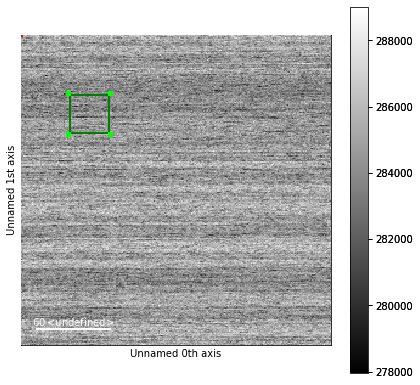

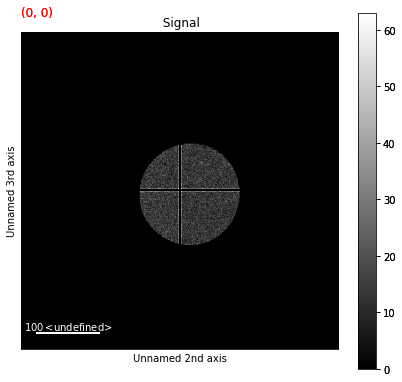

In [8]:
#show area to be cropped
d_sub.plot()
roi_dat = sq_roi.interactive(d_sub)
print(sq_roi)

[########################################] | 100% Completed |  3.1s


2020-06-18 16:56:51,564:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6e2f6b1358>
2020-06-18 16:56:51,566:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:608:Using auto colorbar locator on colorbar
2020-06-18 16:56:51,566:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:609:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6e2f6b1358>
2020-06-18 16:56:51,567:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-18 16:56:51,740:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6e2f5c8320>
2020-06-18 16:56:51,741:/dls_sw/apps/python/a

(32, 32, 515, 515)


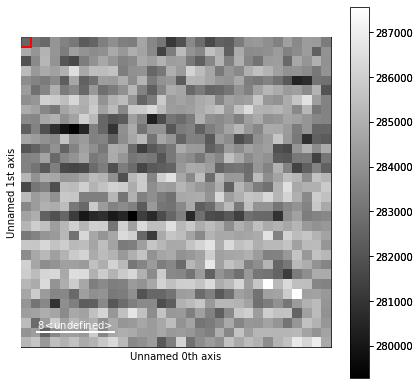

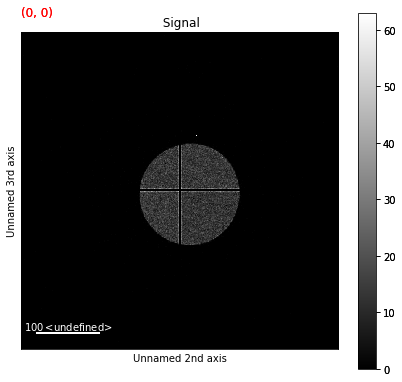

In [9]:
d_crop = sq_roi(d)
d_crop.compute()
d_crop.plot()
print(d_crop.data.shape)

### Create 2D image of 4D data

In [48]:
data = np.array(d_crop.data, dtype=np.float64)
data_tile = ptyrex.core.toolbox.cut2(data, [128,128])
data_bin = np.copy(data_tile)
data_bin = ptyrex.core.toolbox.bin(data_bin, 128)
data_tile = ptyrex.core.toolbox.bin(data_tile, 8)
data_tile = np.abs(ptyrex.core.toolbox.tile(data_tile))
print(data_tile.shape)

(512, 512)


In [49]:
import matplotlib.pyplot as plt
%matplotlib qt5
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.imshow(np.squeeze(data_bin))
plt.subplot(1,2,2)
plt.imshow(data_tile)
plt.gray()
plt.show()

2020-06-17 15:05:58,942:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend Qt5Agg version unknown.
